In [1]:
import os
import sys
import inspect

# insert root dir into sys
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
root_dir = os.path.dirname(currentdir)
# print(root_dir)

if root_dir not in sys.path:
     sys.path.insert(0, root_dir)

#### Abstract:

This file proves both the `scipy.optimize` and the `pytorch.autograd` maxmin implementations work correctly using next model for a test:

1. Поиск седловой точки гиперболического парабалойда:<br>
$loss(Ax, Ay) = \frac{(Ax-a)^{2}}{2}-\frac{(Ay-b)^{2}}{2}$<br>
где Ax, Ay управление сторон A и B.<br>
 lossA = loss<br>
 lossB = -loss<br>
Точное решение: Ax=a, Ay=b

### Scipy optimization:

In [2]:
import sim5_hw1_sciopt as sciopt

In [3]:
sciopt.test_seddle_brute()

numpy.version: 1.18.5
scipy.version: 1.4.1
a, b: (tensor([0.3000]), tensor([0.7000]))
rangesA: [slice(0, 0.6000000238418579, 0.01)]
rangesB: [slice(0, 1.399999976158142, 0.01)]

for given Ay= tensor([0.7000])
result is:
res_Ax:
[0.3]
fval:
0.0
loss: tensor(7.1054e-17, dtype=torch.float64)
working time: 0.0642848014831543


Correct solution (0.3) for a given Ay (0.7) been found!

### Scipy maximin:

In [3]:
import sim5_hw1_scimaxmin as scimaxmin

In [4]:
scimaxmin.test_seddle_brute(1, dbg=False)

a, b: (tensor([0.3000]), tensor([0.7000]))
rangesA: [slice(0, 0.6000000238418579, 0.01)]
rangesB: [slice(0, 1.399999976158142, 0.01)]

init Ax, Ay:
tensor([0.4378])
tensor([1.0548])
opt progress::  0 %
done
lossesA[-1]: -7.10542743701034e-17
lossesB[-1]: -0.009498219937086105
Ax: tensor([0.3000], dtype=torch.float64)
Ay: tensor([0.7000], dtype=torch.float64)


In one shot solution been found!
Notice: Поскольку игра не антагонистическая (lossA independend of lossB) hence both lossA and lossB are close to zero.

### Pytorch.autograd maxmin:

In [2]:
import sim5_hw1 as sm1

/home/valdecar/anaconda3/envs/math/lib/python3.6/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 8000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


opt progress:: █████████ 99 %
done
optimization results:
lossesA[-1]: tensor(-2.1706e-08)
lossesB[-1]: tensor(2.2404e-08)
Ax: tensor(0.2999, requires_grad=True)
Ay: tensor(0.6998, requires_grad=True)


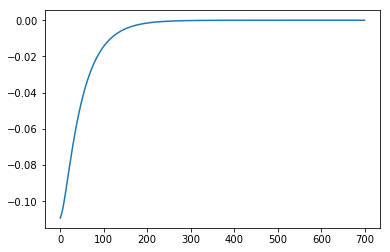

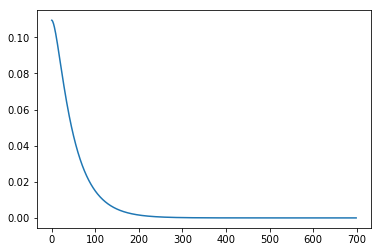

In [3]:
sm1.test_maxmin_seddle(700, 1, 0.001, 0.001, switchB_used=True, dbg=False)

Same result! Notice about losses

### Rejection sampling

Rejection sampling no scores:

In [ ]:
import sim5_hw1_rejsam as rejsam


init Ax, Ay:
tensor(0.0853)
tensor(1.3237)


/home/valdecar/Documents/projects/projectsNew/lab/tree/tf/sim5_hw1_scimaxmin.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(Ax)


opt progress:: █████████ 98 %
done
lossesA[-1]: tensor(0.0018)
lossesB[-1]: tensor(-0.0015)
Ax: tensor(0.2986)
Ay: tensor(0.6924)

mean Axs: tensor(0.2998)
var Axs: tensor(0.0002)

mean Ays: tensor(0.7011)
var Ays: tensor(0.0005)


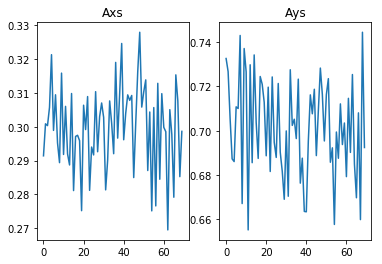

In [3]:
rejsam.test_maxmin_seddle(
    70, sampler_steps=70, use_score=False, threshold=0.0, max_counter=3000, dbg=False)

with scores


init Ax, Ay:
tensor(0.1038)
tensor(0.6344)


/home/valdecar/Documents/projects/projectsNew/lab/tree/tf/sim5_hw1_scimaxmin.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(Ax)


opt progress:: █████████ 98 %
done
lossesA[-1]: tensor(-1.9873)
lossesB[-1]: tensor(-0.3898)
Ax: tensor(0.2676)
Ay: tensor(0.6510)

mean Axs: tensor(0.2979)
var Axs: tensor(0.0026)

mean Ays: tensor(0.7059)
var Ays: tensor(0.0029)


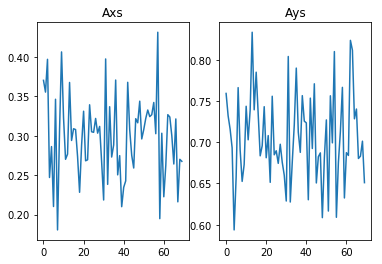

In [4]:
rejsam.test_maxmin_seddle(
    70, sampler_steps=70, use_score=True, threshold=0.0, max_counter=3000, dbg=False)

### Elbo

In [2]:
import maxmin.elbo_core as elbo


init Ax, Ay:
(tensor(0.4233), tensor(1.1823))
(tensor(0.4233), tensor(1.1823))


/home/valdecar/anaconda3/envs/math/lib/python3.6/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 8000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


opt progress:: █████████ 97 %
done
lossesA[-1]: tensor(-1.7970, grad_fn=<ExpandBackward>)
lossesB[-1]: tensor(-0.1787, grad_fn=<ExpandBackward>)
Ax: tensor([0.3353, 0.7777])
Ay: tensor([0.3371, 0.7777])

mean Axs: tensor(0.3795)
var Axs: tensor(0.0009)

mean Ays: tensor(0.9334)
var Ays: tensor(0.0143)


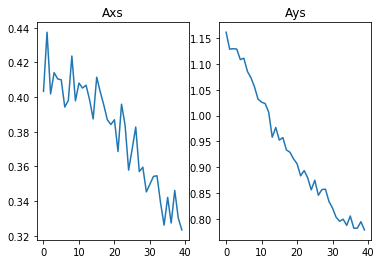

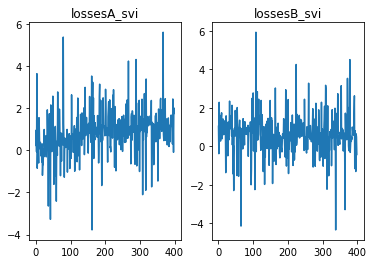

In [3]:
elbo.test_elbo_maxmin(40, 10)

##### Conclusion:

So `scipy`, `pytorch`, `rej.sampling` and `elbo` implementations of maximin working correctly.